In [1]:
def search(pat, txt):
	M = len(pat)
	N = len(txt)

	# A loop to slide pat[] one by one */
	for i in range(N - M + 1):
		j = 0

		# For current index i, check
		# for pattern match */
		while(j < M):
			if (txt[i + j] != pat[j]):
				break
			j += 1

		if (j == M):
			print("Pattern found at index ", i)

In [2]:
def KMPSearch(pat, txt):
	M = len(pat)
	N = len(txt)

	# create lps[] that will hold the longest prefix suffix 
	# values for pattern
	lps = [0]*M
	j = 0 # index for pat[]

	# Preprocess the pattern (calculate lps[] array)
	computeLPSArray(pat, M, lps)

	i = 0 # index for txt[]
	while i < N:
		if pat[j] == txt[i]:
			i += 1
			j += 1

		if j == M:
			print ("Found pattern at index", str(i-j))
			j = lps[j-1]

		# mismatch after j matches
		elif i < N and pat[j] != txt[i]:
			# Do not match lps[0..lps[j-1]] characters,
			# they will match anyway
			if j != 0:
				j = lps[j-1]
			else:
				i += 1

def computeLPSArray(pat, M, lps):
	len = 0 # length of the previous longest prefix suffix

	lps[0] # lps[0] is always 0
	i = 1

	# the loop calculates lps[i] for i = 1 to M-1
	while i < M:
		if pat[i]== pat[len]:
			len += 1
			lps[i] = len
			i += 1
		else:
			# This is tricky. Consider the example.
			# AAACAAAA and i = 7. The idea is similar 
			# to search step.
			if len != 0:
				len = lps[len-1]

				# Also, note that we do not increment i here
			else:
				lps[i] = 0
				i += 1

In [3]:
# Following program is the python implementation of
# Rabin Karp Algorithm given in CLRS book

# d is the number of characters in the input alphabet
d = 256

# pat -> pattern
# txt -> text
# q -> A prime number


def search(pat, txt, q):
	M = len(pat)
	N = len(txt)
	i = 0
	j = 0
	p = 0 # hash value for pattern
	t = 0 # hash value for txt
	h = 1

	# The value of h would be "pow(d, M-1)%q"
	for i in range(M-1):
		h = (h*d) % q

	# Calculate the hash value of pattern and first window
	# of text
	for i in range(M):
		p = (d*p + ord(pat[i])) % q
		t = (d*t + ord(txt[i])) % q

	# Slide the pattern over text one by one
	for i in range(N-M+1):
		# Check the hash values of current window of text and
		# pattern if the hash values match then only check
		# for characters one by one
		if p == t:
			# Check for characters one by one
			for j in range(M):
				if txt[i+j] != pat[j]:
					break
				else:
					j += 1

			# if p == t and pat[0...M-1] = txt[i, i+1, ...i+M-1]
			if j == M:
				print("Pattern found at index " + str(i))

		# Calculate hash value for next window of text: Remove
		# leading digit, add trailing digit
		if i < N-M:
			t = (d*(t-ord(txt[i])*h) + ord(txt[i+M])) % q

			# We might get negative values of t, converting it to
			# positive
			if t < 0:
				t = t+q


# Driver Code
if __name__ == '__main__':
	txt = "GEEKS FOR GEEKS"
	pat = "GEEK"

	# A prime number
	q = 101

	# Function Call
	search(pat, txt, q)

Pattern found at index 0
Pattern found at index 10


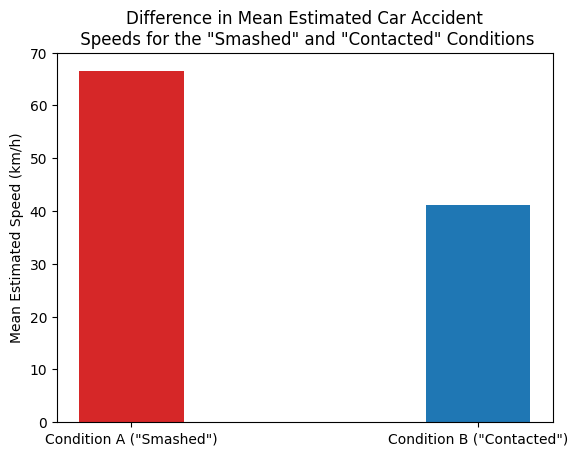

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

fruits = ['Condition A ("Smashed")', 'Condition B ("Contacted")']
counts = [66.6, 41.1]
bar_colors = ['tab:red', 'tab:blue']

ax.bar(fruits, counts, color=bar_colors, align='center')
ax.set_ylim([0, 70])

ax.set_ylabel('Mean Estimated Speed (km/h)')
ax.set_title('Difference in Mean Estimated Car Accident\n Speeds for the "Smashed" and "Contacted" Conditions')

plt.show()